# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_names = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
for city in cities:
    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    # Get weather data
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_names.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])

        # Get the temperature from the response
        print(f"Processing record: {city}.")
        time.sleep(1)
    except:
        print (f"{city} not found. Skipping...")
print (f"Data retrieval finished")

Processing record: dolores hidalgo.
Processing record: mar del plata.
marcona not found. Skipping...
Processing record: ambilobe.
Processing record: bambous virieux.
Processing record: albany.
Processing record: hithadhoo.
Processing record: ushuaia.
Processing record: hermanus.
Processing record: grand gaube.
Processing record: vaini.
Processing record: jamestown.
Processing record: punta arenas.
Processing record: kudahuvadhoo.
Processing record: soanierana ivongo.
Processing record: kavieng.
barentsburg not found. Skipping...
Processing record: maniitsoq.
Processing record: tual.
Processing record: basco.
Processing record: bengkulu.
Processing record: kruisfontein.
Processing record: waw.
Processing record: san jose.
Processing record: yeppoon.
Processing record: barrow.
Processing record: atuona.
Processing record: guerrero negro.
Processing record: port elizabeth.
Processing record: lircay.
Processing record: danielskuil.
Processing record: alamosa.
Processing record: rikitea.
Pr

Processing record: cartagena del chaira.
Processing record: coihaique.
Processing record: kanniyakumari.
Processing record: cidreira.
Processing record: isangel.
Processing record: rawson.
Processing record: sitka.
Processing record: skibbereen.
Processing record: poum.
Processing record: la grande.
Processing record: manyana.
vaitupu not found. Skipping...
Processing record: necochea.
Processing record: fayaoue.
ardistan not found. Skipping...
Processing record: north little rock.
illoqqortoormiut not found. Skipping...
karaul not found. Skipping...
Processing record: alta floresta.
Processing record: rajanpur.
Processing record: saint-philippe.
Processing record: hamilton.
Processing record: tambura.
Processing record: dudinka.
Processing record: skjervoy.
Processing record: donetsk.
Processing record: boende.
Processing record: north platte.
Processing record: moranbah.
Processing record: nadym.
Processing record: anadyr.
Processing record: santa rosalia.
Processing record: taoudenn

Processing record: santa maria.
Processing record: ballina.
tumannyy not found. Skipping...
Processing record: bathsheba.
Processing record: half moon bay.
Processing record: orlik.
Processing record: yashan.
Processing record: saposoa.
Processing record: kuah.
Processing record: luxor.
Processing record: lubumbashi.
Processing record: wanning.
Processing record: chara.
Processing record: vanderhoof.
Processing record: flinders.
Processing record: clonmel.
Processing record: sept-iles.
Processing record: khanpur.
Processing record: wilmington.
Processing record: pedasi.
Processing record: sistranda.
Processing record: tabora.
Processing record: xai-xai.
Processing record: xiongzhou.
abu jubayhah not found. Skipping...
Processing record: rawah.
Processing record: zaragoza.
Processing record: gamba.
Processing record: tottori.
Processing record: katsuura.
Processing record: yanam.
Processing record: mount gambier.
Processing record: berlevag.
Processing record: rabaul.
Processing record:

In [6]:
#Create Dataframe for csv
weather_df = pd.DataFrame({"City":city_names, 
                           "Latitude": lat, 
                           "Longitude": lng, 
                           "Max Temp": max_temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country,
                           "Date": date})

weather_df.to_csv("../output_data/cities.csv")
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dolores Hidalgo Cuna de la Independencia Nacional,21.16,-100.93,60.80,44,5,2.24,MX,1604979105
1,Mar del Plata,-38.00,-57.56,62.01,87,0,3.36,AR,1604979113
2,Ambilobe,-13.20,49.05,80.58,53,52,6.49,MG,1604979115
3,Bambous Virieux,-20.34,57.76,77.00,73,75,10.29,MU,1604979116
4,Albany,42.60,-73.97,51.01,87,20,1.57,US,1604978958
...,...,...,...,...,...,...,...,...,...
555,Salym,60.06,71.48,27.21,98,99,6.93,RU,1604979745
556,Erenhot,43.65,111.98,45.07,48,0,9.08,CN,1604979746
557,Dūngarpur,23.83,73.72,74.93,24,0,6.85,IN,1604979747
558,Saravan,39.72,45.65,35.60,64,40,4.70,AM,1604979749


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Import csv and print description DF
weather_df = pd.read_csv("../output_data/cities.csv")
weather_df.describe()

,Unnamed: 0,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,279.500000,19.660411,18.991625,57.489554,74.021429,49.885714,8.392268,1.604979e+09
std,161.802349,33.132718,91.607754,23.591349,20.296450,39.579423,6.205682,1.948377e+02
min,0.000000,-54.800000,-179.170000,-22.090000,8.000000,0.000000,0.160000,1.604979e+09
25%,139.750000,-7.222500,-63.630000,42.010000,64.000000,3.000000,3.845000,1.604979e+09
50%,279.500000,22.625000,23.595000,63.105000,78.000000,50.000000,6.930000,1.604979e+09
75%,419.250000,47.720000,100.765000,76.027500,90.000000,90.000000,11.410000,1.604980e+09
max,559.000000,78.220000,179.320000,105.800000,100.000000,100.000000,38.030000,1.604980e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

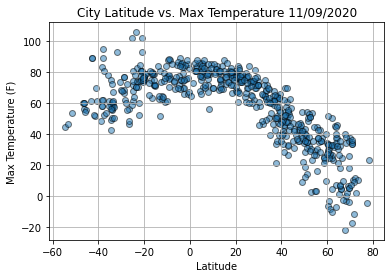

In [8]:
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.title('City Latitude vs. Max Temperature 11/09/2020')
plt.scatter(x_values,y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('../output_data/Fig1.png')
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

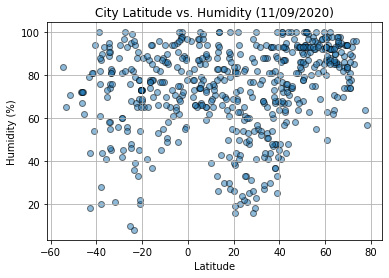

In [9]:
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.title('City Latitude vs. Humidity (11/09/2020)')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../output_data/Fig2.png')
plt.grid(True)
plt.show()

This scatter plot is showing the relationship to the distance from the equator and humidity levels. Higher humidity is seems to be between the 40th and 60th parallels.

## Latitude vs. Cloudiness Plot

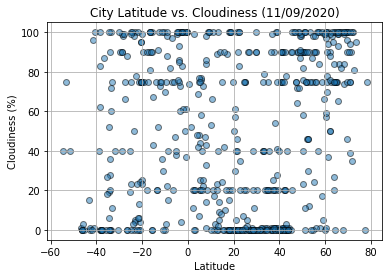

In [10]:
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.title('City Latitude vs. Cloudiness (11/09/2020)')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/Fig3.png')
plt.grid(True)
plt.show()

Cloudiness seems to be more distributed in the parallels north of the equator.

## Latitude vs. Wind Speed Plot

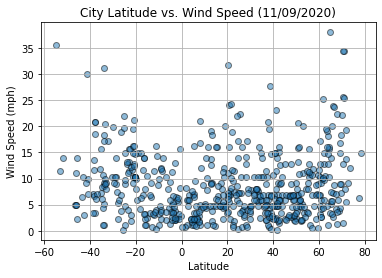

In [11]:
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.title('City Latitude vs. Wind Speed (11/09/2020)')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../output_data/Fig3.png')
plt.grid(True)
plt.show()

In [12]:
Wind speeds seem to be more commonly measured to the north of the equator.

SyntaxError: invalid syntax (<ipython-input-12-da0a929c54e3>, line 1)

## Linear Regression

In [13]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
nhemi_df = weather_df.loc[(weather_df["Latitude"] >= 0)]
shemi_df = weather_df.loc[(weather_df["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7712691213727254


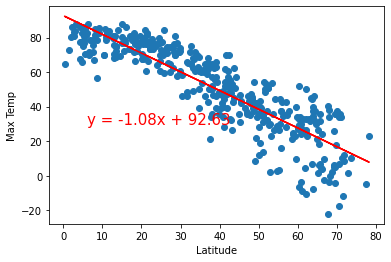

In [14]:
x_values = nhemi_df["Latitude"]
y_values = nhemi_df["Max Temp"]
plt.savefig('../output_data/Fig4.png')
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

As you get farther away from the equator you can see that the max temps are dropping. This makes sense for the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.23505149543873272


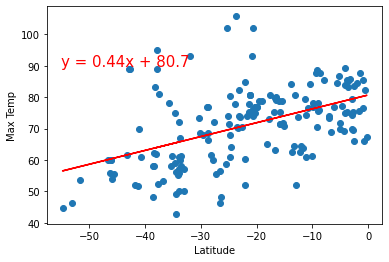

In [15]:
x_values = shemi_df["Latitude"]
y_values = shemi_df["Max Temp"]
plt.savefig('../output_data/Fig5.png')
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

Here you can see that the max temps are higher the closer you get to the equator. This makes sense as the closer you are to the equator the closer you are to the sun.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10166449393520782


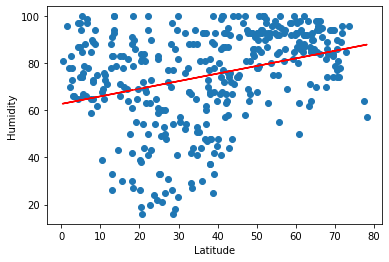

In [17]:
x_values = nhemi_df["Latitude"]
y_values = nhemi_df["Humidity"]
plt.savefig('../output_data/Fig6.png')
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02947709172808952


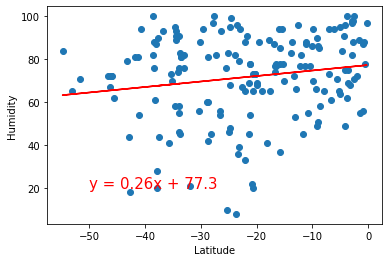

In [18]:
x_values = shemi_df["Latitude"]
y_values = shemi_df["Humidity"]
plt.savefig('../output_data/Fig7.png')
plot_linear_regression(x_values, y_values, 'Humidity',(-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14387104525734687


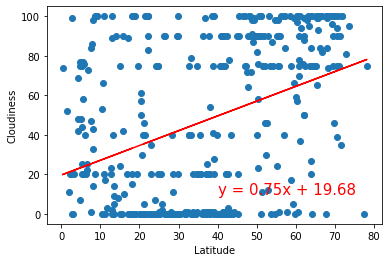

In [19]:
x_values = nhemi_df["Latitude"]
y_values = nhemi_df["Cloudiness"]
plt.savefig('../output_data/Fig8.png')
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1527028541829981


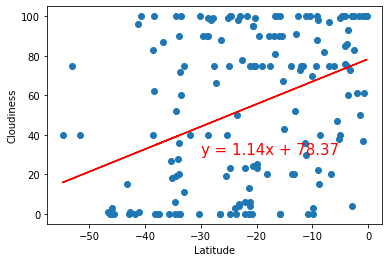

In [20]:
x_values = shemi_df["Latitude"]
y_values = shemi_df["Cloudiness"]
plt.savefig('../output_data/Fig9.png')
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.048159562470628026


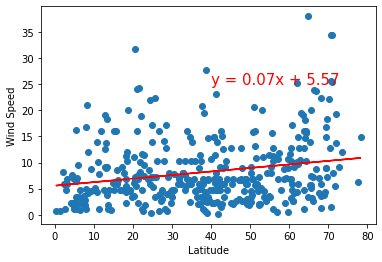

In [21]:
x_values = nhemi_df["Latitude"]
y_values = nhemi_df["Wind Speed"]
plt.savefig('../output_data/Fig10.png')
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1205754588441621


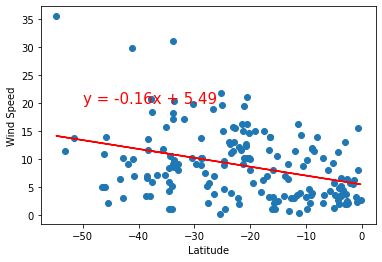

In [22]:
x_values = shemi_df["Latitude"]
y_values = shemi_df["Wind Speed"]
plt.savefig('../output_data/Fig11.png')
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))